In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
from geopy.distance import geodesic
import joblib

In [2]:
db = pd.read_csv('dataset.csv')
db.sample(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
996975,996975,2020-02-12 03:57:51,4063094974360571498,"fraud_Greenholt, Jacobi and Gleason",gas_transport,83.23,Patricia,Mendoza,F,1683 Davidson Freeway,...,41.7100,-111.9817,2078,"Scientist, audiological",1963-06-13,e8e878c9e03b22ff8c0d571a8d0d00be,1360641471,41.013546,-112.899660,0
1251880,1251880,2020-06-05 12:47:58,3553629419254918,"fraud_Roberts, Ryan and Smith",personal_care,10.83,Sharon,Johnson,F,7202 Jeffrey Mills,...,48.3400,-122.3456,85,"Research officer, political party",1984-09-01,45b97e691cc94270d827c1afaa022087,1370436478,49.195038,-121.510808,0
243549,243549,2019-05-02 08:38:32,2227671554547514,"fraud_Harris, Gusikowski and Heaney",grocery_net,70.26,Angie,Jones,F,6970 Blake Trail,...,27.9004,-82.7152,172247,"Geneticist, molecular",1979-10-22,e8e0d38a0f979519e712caac5ccfd58e,1335947912,28.060913,-83.226801,0
1178695,1178695,2020-05-07 02:36:49,2348245054386329,"fraud_Larkin, Stracke and Greenfelder",entertainment,46.83,Justin,Gay,M,268 Hayes Rue Suite 811,...,42.1767,-79.9416,2518,Event organiser,1946-02-02,dd7b7b03883272daa7064578ea3fe131,1367894209,42.858635,-79.960785,0
601271,601271,2019-09-12 17:48:31,3586008444788268,fraud_Hamill-D'Amore,health_fitness,10.95,Crystal,Fuller,F,000 Jennifer Mills,...,47.4974,-122.0107,50489,Osteopath,1984-02-29,587504f751fd12b2216df3e32236c069,1347472111,47.827565,-122.475643,0


In [5]:
db[db['is_fraud'] == 1]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1
2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1
2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1
2546,2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1
2553,2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295399,1295399,2020-06-21 01:00:08,3524574586339330,fraud_Kassulke PLC,shopping_net,977.01,Ashley,Cabrera,F,94225 Smith Springs Apt. 617,...,27.6330,-80.4031,105638,"Librarian, public",1986-05-07,a83b093f0c1d9068fa0089f7c722615f,1371776408,26.888686,-80.834389,1
1295491,1295491,2020-06-21 01:53:35,3524574586339330,fraud_Schumm PLC,shopping_net,1210.91,Ashley,Cabrera,F,94225 Smith Springs Apt. 617,...,27.6330,-80.4031,105638,"Librarian, public",1986-05-07,f75b35bed13b9e692f170dba45a15b21,1371779615,28.216707,-79.855648,1
1295532,1295532,2020-06-21 02:16:56,4005676619255478,"fraud_Tillman, Dickinson and Labadie",gas_transport,10.24,William,Perry,M,458 Phillips Island Apt. 768,...,30.4590,-90.9027,71335,Herbalist,1994-05-31,a0ba2472cd3fc9731f2a18d3f308f5c3,1371781016,29.700456,-91.361632,1
1295666,1295666,2020-06-21 03:26:20,3560725013359375,fraud_Corwin-Collins,gas_transport,21.69,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,daa281350b1e16093c7b4bf97bf4d6ed,1371785180,32.675272,-103.484949,1


In [69]:
db.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [70]:
db = db.drop(['Unnamed: 0', 'merchant', 'first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num'], axis=1)


In [71]:
db.sample(5)

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
723441,2019-11-04 18:46:20,4181833256558613886,home,40.66,F,36.6659,-105.4694,606,"Surveyor, land/geomatics",1352054780,36.882991,-104.994600,0
241099,2019-04-30 19:59:30,36722699017270,kids_pets,52.15,F,33.2887,-111.0985,2872,Petroleum engineer,1335815970,33.949467,-110.461216,0
843341,2019-12-14 10:23:01,4584931703207308232,grocery_pos,193.59,F,32.8463,-96.6972,1263321,"Designer, ceramics/pottery",1355480581,33.060187,-96.042359,0
881387,2019-12-22 13:50:26,3506592072985012,entertainment,29.79,M,38.5770,-90.5255,92608,"Engineer, communications",1356184226,37.894685,-91.188713,0
1020118,2020-02-25 13:10:49,4025612008285111,health_fitness,72.91,F,41.1762,-79.1976,1274,Maintenance engineer,1361797849,41.252176,-78.921545,0


In [72]:
# Feature Engineering

# Time Based Features
db['trans_date_trans_time'] = pd.to_datetime(db['trans_date_trans_time'])
# Hour of day
db['hour_of_day'] = db['trans_date_trans_time'].dt.hour

# Day of week
db['day_of_week'] = db['trans_date_trans_time'].dt.dayofweek

# Is Weekend
db['is_weekend'] = db['day_of_week'].apply(lambda x: 1 if x >=5 else 0)

# Time between current and previous one for same cc_num
db = db.sort_values(by=['cc_num', 'trans_date_trans_time'])
db['time_since_last'] = db.groupby('cc_num')['unix_time'].diff()


In [73]:
# Handle NAN values of time_since_last
db['time_since_last'] = db['time_since_last'].fillna(1e9)

# Drop column
db = db.drop('trans_date_trans_time', axis=1)

In [74]:
# Amount Based Features

# Standardized Amount
amt_stats = db.groupby('cc_num')['amt'].agg(['mean', 'std']).reset_index()
amt_stats.columns = ['cc_num', 'amt_mean', 'amt_std']
db = db.merge(amt_stats, on='cc_num', how='left')
db['amt_standardized'] = (db['amt'] - db['amt_mean']) / db['amt_std']

# Amount Deviation
db['amt_deviation'] = abs(db['amt'] - db['amt_mean'])

# Remove intermediate features
db = db.drop(['amt_mean', 'amt_std'], axis=1)


In [75]:
# Location Based Features

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance in km between two points on the earth
    (specified in decimal degrees)
    """
    return np.array([geodesic((a, b), (c,d)).km for a, b, c, d in zip(lat1, lon1, lat2, lon2)])

# Calculate distance between origin and destination
db['distance_from_home'] = haversine(db['lat'], db['long'], db['merch_lat'], db['merch_long'])

# Is Transaction in Home City
threshold = 50 # kms
db['is_in_home_city'] = (db['distance_from_home'] <= threshold).astype(int)

In [76]:
db.sample(5)

,cc_num,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,hour_of_day,day_of_week,is_weekend,time_since_last,amt_standardized,amt_deviation,distance_from_home,is_in_home_city
102895,4103158249977,health_fitness,73.44,M,33.6666,-101.5277,1571,Petroleum engineer,1347148146,32.727268,-100.814727,0,23,6,1,46081.0,-0.223665,19.230791,123.583400,0
821558,3593118134380341,kids_pets,143.99,F,44.4971,-67.9503,1131,Make,1360171317,44.101925,-68.849501,0,17,3,0,2073.0,0.894427,84.427418,84.126210,0
1043103,4969856774088583,home,111.68,F,29.9975,-90.2146,137067,Advertising account planner,1347397378,29.929659,-91.039870,0,21,2,0,100602.0,0.179124,39.418160,80.010318,0
452732,370818583810103,home,27.28,M,39.9373,-79.1865,3684,General practice doctor,1329603065,39.780376,-79.497226,0,22,0,0,23432.0,-0.200834,40.923084,31.788915,1
1042221,4961003488432306,food_dining,18.68,F,40.6284,-76.1950,1606,Ecologist,1353069506,40.522064,-76.857545,0,12,5,1,38448.0,-0.358562,40.442505,57.328770,0


In [77]:
# Frequency Based Features

# Number of transactions in the last hour
db = db.sort_values(by=['cc_num', 'unix_time'])
db['trans_datetime'] = pd.to_datetime(db['unix_time'], unit='s')
db.set_index('trans_datetime', inplace=True)
db['trans_last_hour'] = db.groupby('cc_num').rolling('1H').count()['amt'].values
db.reset_index(inplace=True)


C:\Users\Sachin\AppData\Local\Temp\ipykernel_2928\1221182.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  db['trans_last_hour'] = db.groupby('cc_num').rolling('1H').count()['amt'].values


In [ ]:
# Drop the temporary trans_date column
db = db.drop(['trans_datetime'], axis=1)

In [83]:
db.drop(['unix_time'], axis=1, inplace=True)

In [86]:
db.drop(['job'], axis=1, inplace=True)

In [87]:
db.sample(5)

,cc_num,category,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud,hour_of_day,day_of_week,is_weekend,time_since_last,amt_standardized,amt_deviation,distance_from_home,is_in_home_city,trans_last_hour
961102,4587577161160601,grocery_pos,99.49,F,44.0943,-69.4828,1643,44.993574,-68.975430,0,11,3,0,46356.0,0.236250,39.353156,107.757137,0,1.0
1194919,4210078554961359092,shopping_pos,2.99,F,43.9210,-122.7806,1420,42.971415,-123.506299,0,11,0,0,12164.0,-0.567516,61.096677,120.751282,0,1.0
688182,3536918668124647,health_fitness,88.50,F,37.3304,-121.7913,973849,37.546540,-120.914183,0,13,4,0,14316.0,0.108417,15.316358,81.244836,0,1.0
370684,213148039875802,entertainment,172.88,F,27.9551,-82.2966,79613,28.335222,-82.921758,0,15,3,0,9481.0,0.321621,80.464511,74.468973,0,1.0
146167,4586260469584,health_fitness,66.99,F,40.1362,-95.2138,1631,40.960033,-95.249277,0,23,0,0,21351.0,0.044324,4.753343,91.532032,0,1.0


In [89]:
# Encode into numerical values
cat_col = ['category', 'gender']

le_category = LabelEncoder()
le_gender = LabelEncoder()

db['category_encoded'] = le_category.fit_transform(db['category'])
db['gender_encoded'] = le_gender.fit_transform(db['gender'])

db.drop(cat_col, axis=1, inplace=True)

In [97]:
db.sample(5)

,cc_num,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,hour_of_day,day_of_week,is_weekend,time_since_last,amt_standardized,amt_deviation,distance_from_home,is_in_home_city,trans_last_hour,category_encoded,gender_encoded
391451,213178765398315,56.66,43.0351,-108.2024,19408,42.666769,-107.481349,0,10,5,1,19811.0,-0.016513,2.869246,71.748098,0,1.0,4,1
190119,30029052116970,71.32,42.1239,-79.1895,3833,41.688713,-79.938187,0,3,0,0,23933.0,0.124064,14.377611,78.710119,0,1.0,2,1
1149467,6534628260579800,41.54,44.3346,-73.0980,4542,45.039828,-73.484040,0,23,5,1,2310.0,-0.070179,10.906693,84.132014,0,2.0,7,0
1043459,4969856774088583,6.63,29.9975,-90.2146,137067,29.754949,-89.666092,0,23,3,0,145540.0,-0.298245,65.631840,59.419940,0,1.0,10,0
826662,3596217206093829,8.47,40.8626,-91.9534,888,41.298122,-92.735516,0,10,5,1,14284.0,-0.395819,51.810147,81.601811,0,1.0,8,0


In [95]:
import pickle

In [96]:
with open('category_encoder.pkl', 'wb') as f:
    pickle.dump(le_category, f)
with open('gender_encoder.pkl', 'wb') as f:
    pickle.dump(le_gender, f)

In [117]:
x = db.drop(['is_fraud', 'lat', 'long', 'merch_lat', 'merch_long'], axis=1)
y = db['is_fraud']

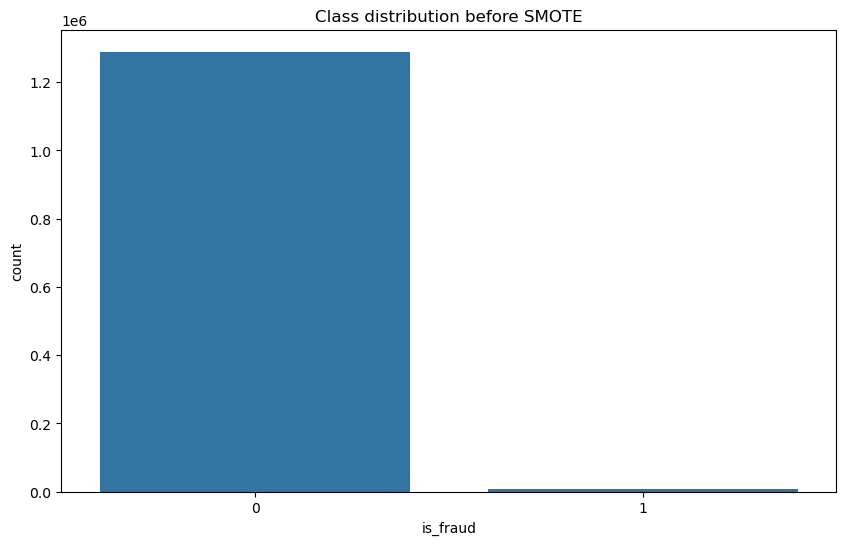

In [119]:
plt.figure(figsize=(10,6))
sns.countplot(x='is_fraud', data=db)
plt.title('Class distribution before SMOTE')
plt.show()

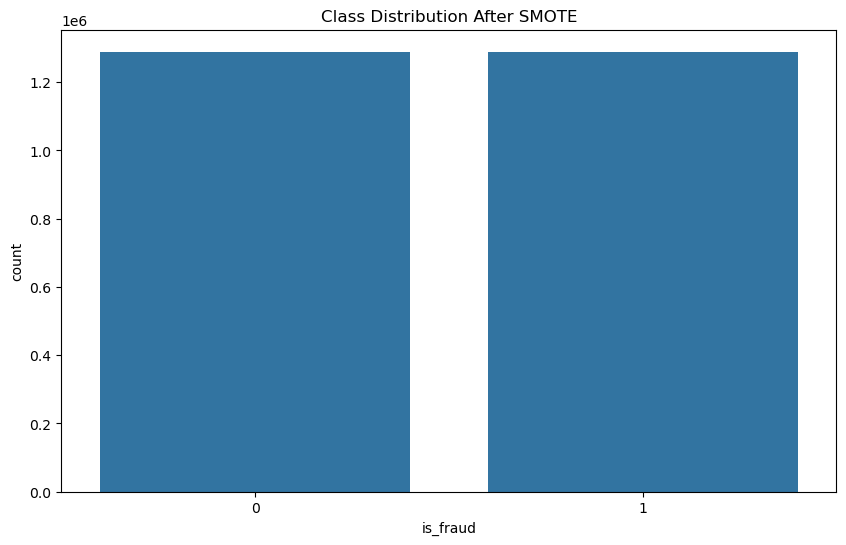

In [120]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x,y)

plt.figure(figsize=(10,6))
sns.countplot(x=y_resampled)
plt.title('Class Distribution After SMOTE')
plt.show()

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

In [122]:
import lightgbm as lgb

In [123]:
lgb_model = lgb.LGBMClassifier(
    boosting_type='gbdt',
    objective='binary',
    metric='auc',
    is_unbalance=True,
    learning_rate=0.05,
    num_leaves=31,
    max_depth=-1,
    n_estimators=200
)

lgb_model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 1030782, number of negative: 1031888
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.140966 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2090
[LightGBM] [Info] Number of data points in the train set: 2062670, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499732 -> initscore=-0.001072
[LightGBM] [Info] Start training from score -0.001072


LGBMClassifier(is_unbalance=True, learning_rate=0.05, metric='auc',
               n_estimators=200, objective='binary')

In [124]:
y_pred = lgb_model.predict(x_test)
print("Classification Report: \n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99    257281
           1       0.99      0.98      0.99    258387

    accuracy                           0.99    515668
   macro avg       0.99      0.99      0.99    515668
weighted avg       0.99      0.99      0.99    515668

ROC AUC Score: 0.9862396117994561


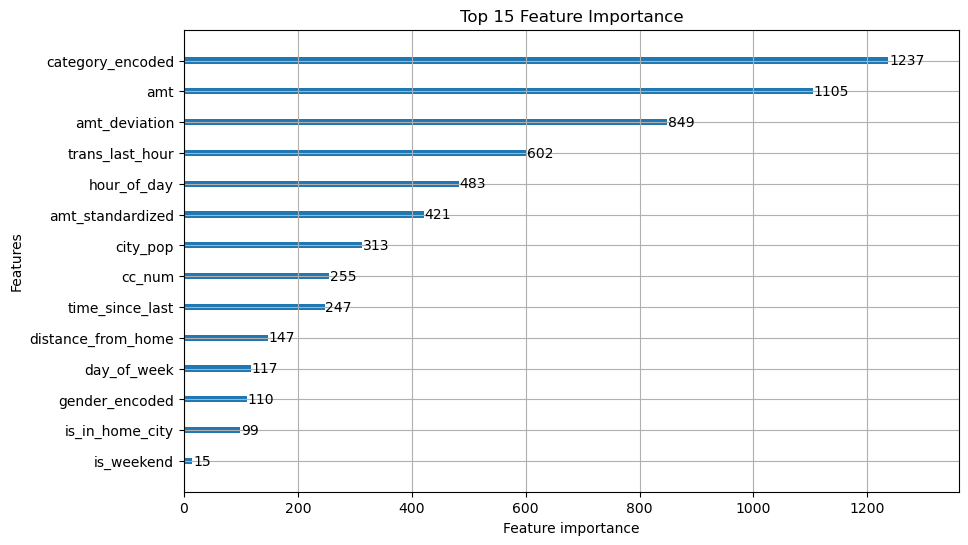

In [126]:
lgb.plot_importance(lgb_model, max_num_features=15, importance_type='split', figsize=(10, 6))
plt.title('Top 15 Feature Importance')
plt.show()

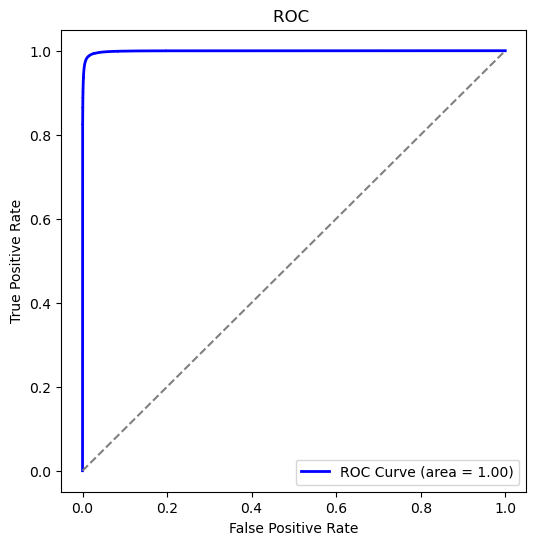

In [127]:
fpr, tpr, thresholds = roc_curve(y_test, lgb_model.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [128]:
joblib.dump(lgb_model, 'fraud_detection_model.jb')

['fraud_detection_model.jb']